# EN3160 Assignment 1 on Intensity Transformations and Neighborhood Filtering

###  1. Implement the intensity transformation depicted in Fig. 1a on the image shown in Fig. 1b.

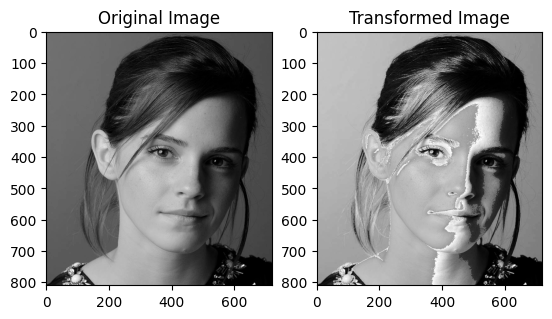

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (Grayscale)
img1 = cv2.imread('a1images/emma.jpg', 0)  # 0 to load in grayscale

# Create an empty array for the transformed image
new_img = np.zeros_like(img1)

width, height = img1.shape

# Apply the transformation
for i in range(width):
    for j in range(height):
        pixel = img1[i, j]
        if pixel < 50:
            new_img[i, j] = pixel
        elif 50 <= pixel <= 150:
            new_img[i, j] = 1.55*pixel + 22.5
        else:
            new_img[i, j] = pixel

# Plot original and transformed images
plt.subplot(121)
plt.imshow(img1, cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(new_img, cmap='gray')
plt.title('Transformed Image')
plt.show()


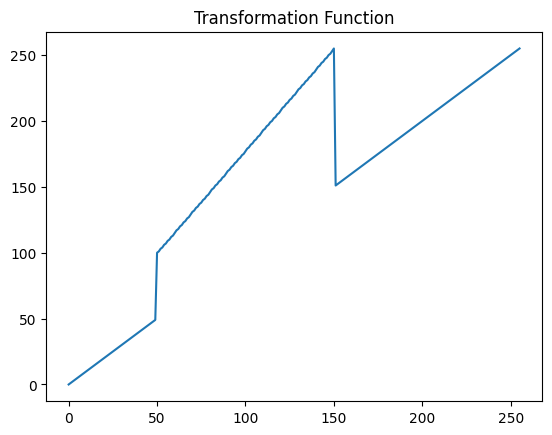

In [3]:
# plot the transformation function
x = np.arange(0, 256)
y = np.piecewise(x, [x < 50, (50 <= x) & (x <= 150), x > 150], [lambda x: x, lambda x: 1.55*x + 22.5, lambda x: x])
plt.plot(x, y)
plt.title('Transformation Function')
plt.show()


### 2. Apply a similar operation as above to accentuate the white matter and gray matter in the brain proton density image. Show the intensity transformations as a plots

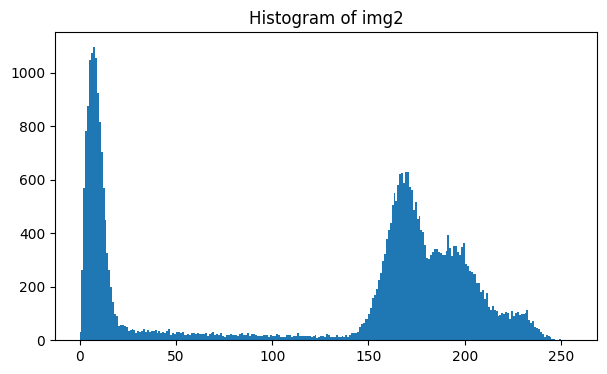

In [4]:
img2 = cv2.imread('a1images/brain_proton_density_slice.png', 0)  # 0 to load in grayscale

# plot the histogram of img2
plt.figure(figsize=(7, 4))
plt.hist(img2.ravel(), 256, [0, 256])
plt.title('Histogram of img2')
plt.show()

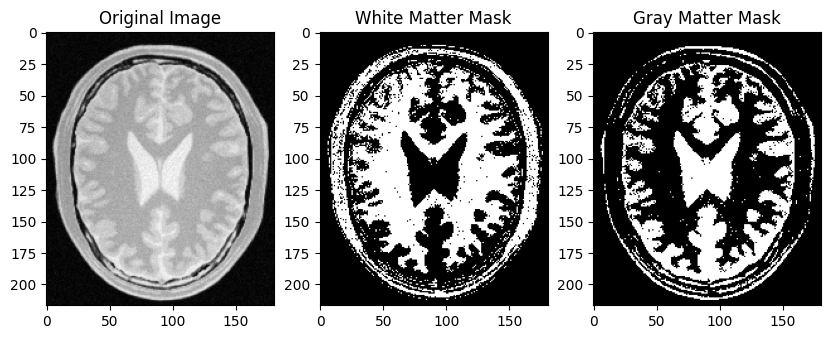

In [113]:
# Function to transform pixel intensities for white and gray matter
brain_proton_img = cv2.imread('a1images/brain_proton_density_slice.png', 0)
def accentuate_matter(image):
    # Create a copy of the image to apply transformations
    #transformed_image = np.copy(image)
    
    # Apply transformation for white matter (150 <= pixel <= 250) # gray matter is brigher than white 
    gray_matter_transform = (image >= 186) & (image <= 250)
    brain_proton_img[gray_matter_transform] = np.minimum((1 * image[gray_matter_transform] + 30), 255)
    
    # Apply transformation for gray matter (50 <= pixel <= 150) # white matter is darker than gray
    white_matter_transform = (image >= 150) & (image <= 185)
    brain_proton_img[white_matter_transform] = np.minimum((1.55 * image[white_matter_transform] + 22.5),255)
    
    
    return white_matter_transform, gray_matter_transform

# Apply the transformation to the brain image
white_matter_transform, gray_matter_transform = accentuate_matter(brain_proton_img)

# Display the transformed image
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img2, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(white_matter_transform, cmap='gray')
plt.title("White Matter Mask")

plt.subplot(1, 3, 3)
plt.imshow(gray_matter_transform, cmap='gray')
plt.title("Gray Matter Mask")
plt.show()

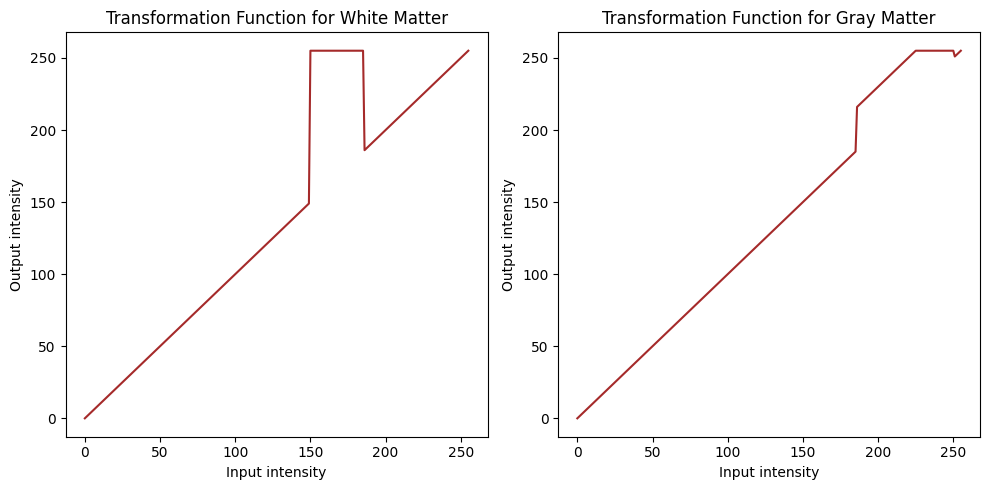

In [6]:
# Vectorize the functions so they can be applied to NumPy arrays
def transform_white_matter(pixel):
    if 150 <= pixel <= 185:
        return np.minimum(1.55 * pixel + 22.5, 255)
    return pixel

def transform_gray_matter(pixel):
    if 186 <= pixel <= 250:
        return np.minimum(1 * pixel + 30,255)
    return pixel

vec_transform_for_white_matter = np.vectorize(transform_white_matter)
vec_transform_for_gray_matter = np.vectorize(transform_gray_matter)

# Define the input range
x = np.arange(0, 256)

# Apply the transformations
y_white = vec_transform_for_white_matter(x)
y_gray = vec_transform_for_gray_matter(x)

# Plot the transformation functions
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(x, y_white, color='brown')
plt.title('Transformation Function for White Matter')
plt.xlabel('Input intensity')
plt.ylabel('Output intensity')

plt.subplot(1, 2, 2)
plt.plot(x, y_gray, color='brown')
plt.title('Transformation Function for Gray Matter')
plt.xlabel('Input intensity')
plt.ylabel('Output intensity')

plt.tight_layout()
plt.show()


### 3. Applying Gamma Correction

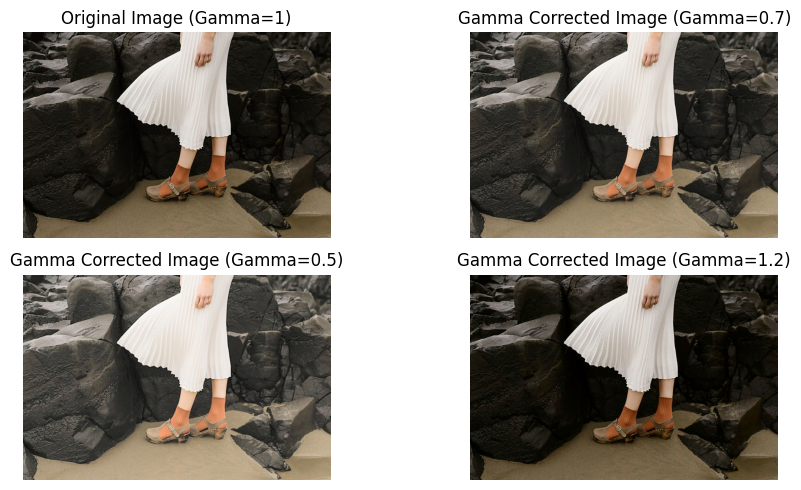

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img3 = cv2.imread('a1images/highlights_and_shadows.jpg')

# Convert to L*a*b* color space
lab = cv2.cvtColor(img3, cv2.COLOR_BGR2LAB)
L, a, b = cv2.split(lab)

# Apply gamma correction to the L plane
gamma = 0.7  

L_corrected = np.array(255 * (L / 255) ** gamma, dtype='uint8')

# Merge the corrected L plane with the original a and b planes
lab_corrected = cv2.merge([L_corrected, a, b])

# Convert back to RGB color space
img_corrected = cv2.cvtColor(lab_corrected, cv2.COLOR_LAB2BGR)
img_corrected_rgb = cv2.cvtColor(img_corrected, cv2.COLOR_BGR2RGB)  
img_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB) 

gamma = 0.5  

L_corrected1 = np.array(255 * (L / 255) ** gamma, dtype='uint8')

# Merge the corrected L plane with the original a and b planes
lab_corrected1 = cv2.merge([L_corrected1, a, b])

# Convert back to RGB color space
img_corrected1 = cv2.cvtColor(lab_corrected1, cv2.COLOR_LAB2BGR)
img_corrected_rgb2 = cv2.cvtColor(img_corrected1, cv2.COLOR_BGR2RGB)  

gamma = 1.2 

L_corrected2 = np.array(255 * (L / 255) ** gamma, dtype='uint8')

# Merge the corrected L plane with the original a and b planes
lab_corrected2 = cv2.merge([L_corrected2, a, b])

# Convert back to RGB color space
img_corrected2 = cv2.cvtColor(lab_corrected2, cv2.COLOR_LAB2BGR)
img_corrected_rgb3 = cv2.cvtColor(img_corrected2, cv2.COLOR_BGR2RGB)  

# Plot using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image (Gamma=1)')
plt.axis('off')  

plt.subplot(2, 2, 2)
plt.imshow(img_corrected_rgb)
plt.title('Gamma Corrected Image (Gamma=0.7)')
plt.axis('off') 

plt.subplot(2, 2, 3)
plt.imshow(img_corrected_rgb2)
plt.title('Gamma Corrected Image (Gamma=0.5)')
plt.axis('off')  

plt.subplot(2, 2, 4)
plt.imshow(img_corrected_rgb3)
plt.title('Gamma Corrected Image (Gamma=1.2)')
plt.axis('off') 

plt.tight_layout()
plt.show()

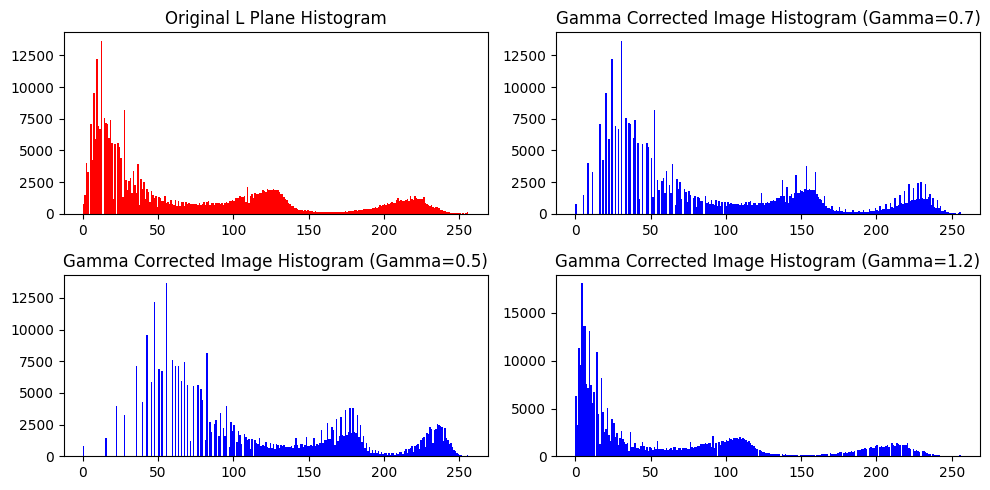

In [8]:
# Plot histograms
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.hist(L.flatten(), bins=256, range=[0, 256], color='r')
plt.title('Original L Plane Histogram')

plt.subplot(2, 2, 2)
plt.hist(L_corrected.flatten(), bins=256, range=[0, 256], color='b')
plt.title('Gamma Corrected Image Histogram (Gamma=0.7)')

plt.subplot(2, 2, 3)
plt.hist(L_corrected1.flatten(), bins=256, range=[0, 256], color='b')
plt.title('Gamma Corrected Image Histogram (Gamma=0.5)')

plt.subplot(2, 2, 4)
plt.hist(L_corrected2.flatten(), bins=256, range=[0, 256], color='b')
plt.title('Gamma Corrected Image Histogram (Gamma=1.2)')

plt.tight_layout()
plt.show()

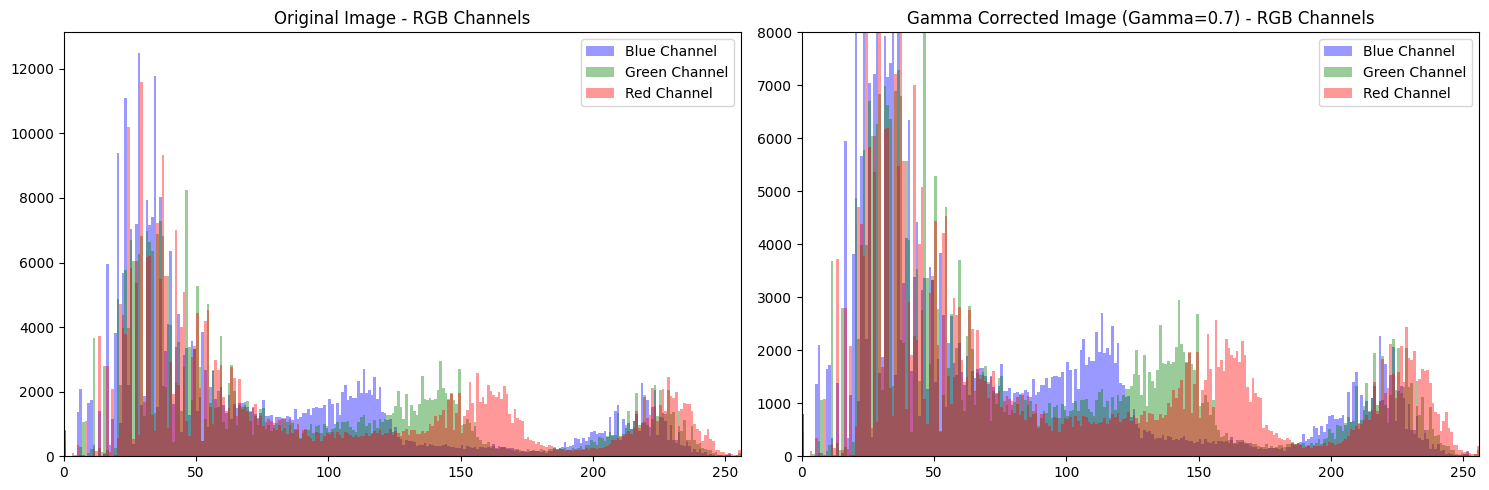

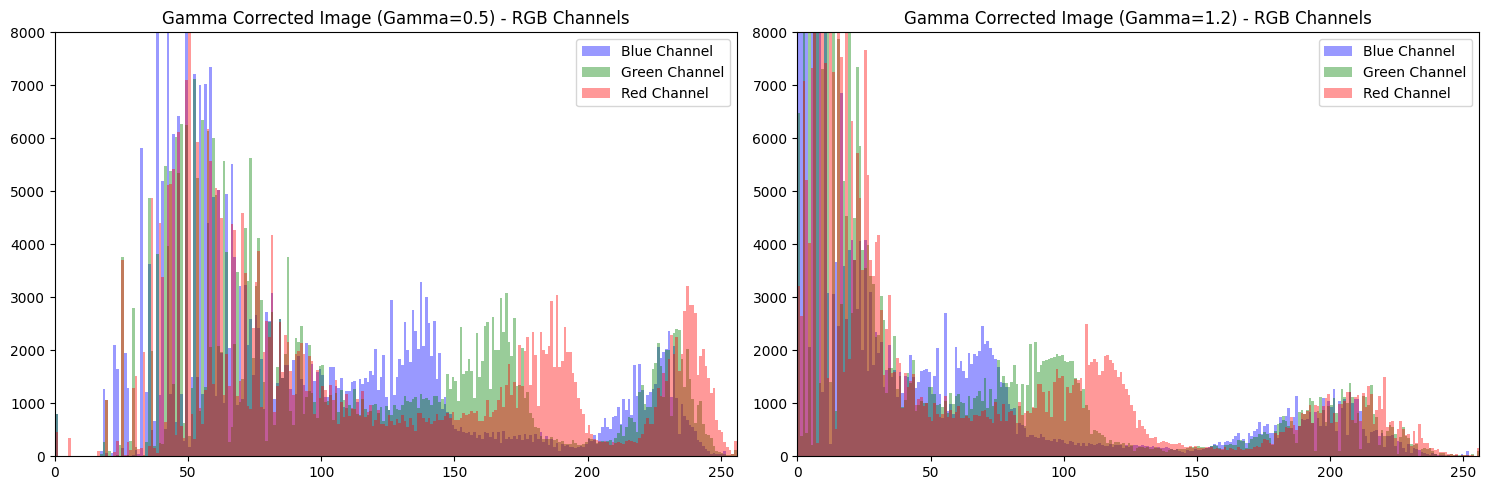

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming bgr_img is the original image and gamma_corrected_img is the gamma-corrected image

# Create subplots for original and gamma corrected image histograms
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Original image histograms (Red, Green, Blue in the same plot)
axs[0].set_title("Original Image - RGB Channels")
axs[0].hist(img_corrected[:, :, 0].flatten(), bins=256, range=[0, 256], color='b', alpha=0.4, label='Blue Channel')
axs[0].hist(img_corrected[:, :, 1].flatten(), bins=256, range=[0, 256], color='g', alpha=0.4, label='Green Channel')
axs[0].hist(img_corrected[:, :, 2].flatten(), bins=256, range=[0, 256], color='r', alpha=0.4, label='Red Channel')
axs[0].set_xlim([0, 256])
axs[0].legend()

# Gamma = 0.7
axs[1].set_title("Gamma Corrected Image (Gamma=0.7) - RGB Channels")
axs[1].hist(img_corrected[:, :, 0].flatten(), bins=256, range=[0, 256], color='b', alpha=0.4, label='Blue Channel')
axs[1].hist(img_corrected[:, :, 1].flatten(), bins=256, range=[0, 256], color='g', alpha=0.4, label='Green Channel')
axs[1].hist(img_corrected[:, :, 2].flatten(), bins=256, range=[0, 256], color='r', alpha=0.4, label='Red Channel')
axs[1].set_xlim([0, 256])
axs[1].set_ylim([0, 8000])  # Set a y-axis limit to reduce dominance of zeros
axs[1].legend()

# Show the figure
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Gamma = 0.5
axs[0].set_title("Gamma Corrected Image (Gamma=0.5) - RGB Channels")
axs[0].hist(img_corrected1[:, :, 0].flatten(), bins=256, range=[0, 256], color='b', alpha=0.4, label='Blue Channel')
axs[0].hist(img_corrected1[:, :, 1].flatten(), bins=256, range=[0, 256], color='g', alpha=0.4, label='Green Channel')
axs[0].hist(img_corrected1[:, :, 2].flatten(), bins=256, range=[0, 256], color='r', alpha=0.4, label='Red Channel')
axs[0].set_xlim([0, 256])
axs[0].set_ylim([0, 8000])  
axs[0].legend()

# Gamma = 1.2
axs[1].set_title("Gamma Corrected Image (Gamma=1.2) - RGB Channels")
axs[1].hist(img_corrected2[:, :, 0].flatten(), bins=256, range=[0, 256], color='b', alpha=0.4, label='Blue Channel')
axs[1].hist(img_corrected2[:, :, 1].flatten(), bins=256, range=[0, 256], color='g', alpha=0.4, label='Green Channel')
axs[1].hist(img_corrected2[:, :, 2].flatten(), bins=256, range=[0, 256], color='r', alpha=0.4, label='Red Channel')
axs[1].set_xlim([0, 256])
axs[1].set_ylim([0, 8000])  
axs[1].legend()

# Show the figure
plt.tight_layout()
plt.show()

### Question 4

### (a) Split the image shown in Fig. 4 into hue, saturation, and value planes.

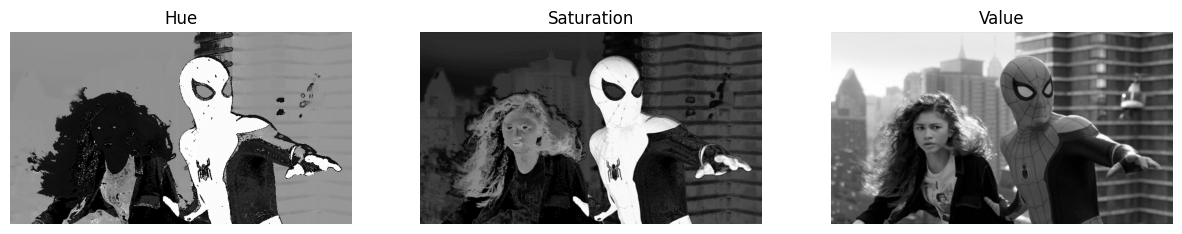

In [10]:
img4 = cv2.imread('a1images/spider.png')  

# Convert image to HSV
hsv = cv2.cvtColor(img4, cv2.COLOR_BGR2HSV)

# Split the image into hue, saturation, and value channels
H, S, V = cv2.split(hsv)

# Plot
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1), plt.imshow(H, cmap='gray'), plt.title('Hue')
plt.axis('off')
plt.subplot(1,3,2), plt.imshow(S, cmap='gray'), plt.title('Saturation')
plt.axis('off')
plt.subplot(1,3,3), plt.imshow(V, cmap='gray'), plt.title('Value')
plt.axis('off')
plt.show()


### (b) Apply the aforementioned intensity transformation to the saturation plane.

In [11]:
sigma = 70

def vibrance_enhance(x, a, sigma):
    return min(x + a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2)), 255)

In [12]:
a=0.25
S_enhanced1 = np.array([vibrance_enhance(x, a, sigma) for x in S.flatten()]).reshape(S.shape).astype('uint8')
hsv_enhanced1 = cv2.merge([H, S_enhanced1, V])
img_vibrance_enhanced1 = cv2.cvtColor(hsv_enhanced1, cv2.COLOR_HSV2BGR)

a=0.5
S_enhanced2 = np.array([vibrance_enhance(x, a, sigma) for x in S.flatten()]).reshape(S.shape).astype('uint8')
hsv_enhanced2 = cv2.merge([H, S_enhanced2, V])
img_vibrance_enhanced2 = cv2.cvtColor(hsv_enhanced2, cv2.COLOR_HSV2BGR)

a=0.75
S_enhanced3 = np.array([vibrance_enhance(x, a, sigma) for x in S.flatten()]).reshape(S.shape).astype('uint8')
hsv_enhanced3 = cv2.merge([H, S_enhanced3, V])
img_vibrance_enhanced3 = cv2.cvtColor(hsv_enhanced3, cv2.COLOR_HSV2BGR)


### (e) Display the original image, vibrance-enhanced image, and the intensity transformation.

(-0.5, 779.5, 437.5, -0.5)

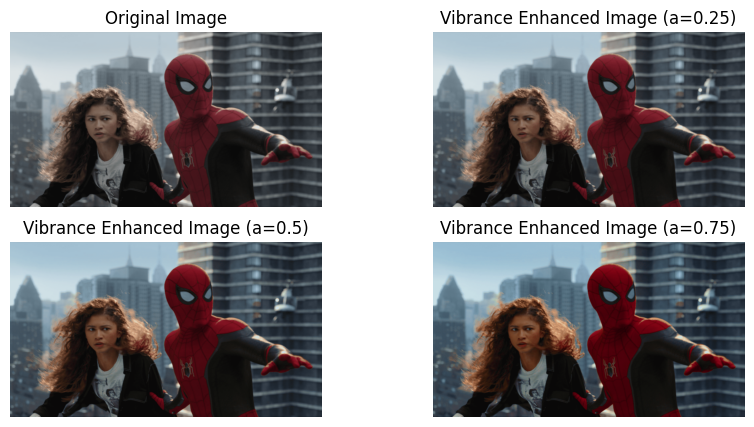

In [13]:
# Display the original and enhanced images
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(img_vibrance_enhanced1, cv2.COLOR_BGR2RGB))
plt.title('Vibrance Enhanced Image (a=0.25)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(img_vibrance_enhanced2, cv2.COLOR_BGR2RGB))
plt.title('Vibrance Enhanced Image (a=0.5)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(img_vibrance_enhanced3, cv2.COLOR_BGR2RGB))
plt.title('Vibrance Enhanced Image (a=0.75)')
plt.axis('off')

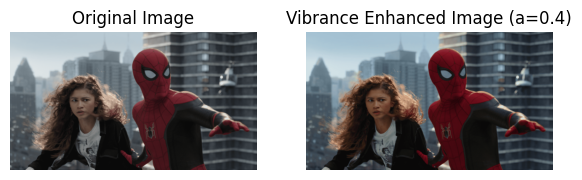

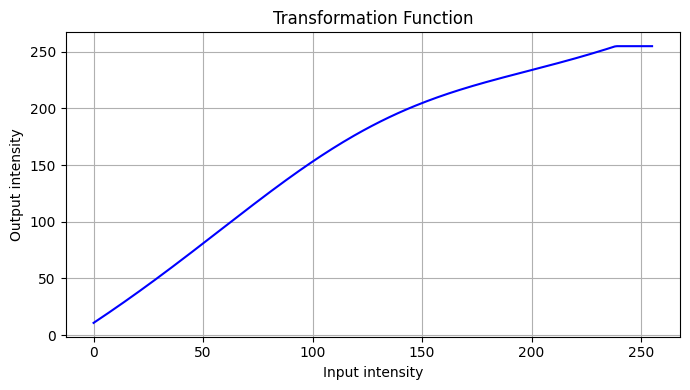

In [14]:
a=0.45
S_enhanced = np.array([vibrance_enhance(x, a, sigma) for x in S.flatten()]).reshape(S.shape).astype('uint8')
hsv_enhanced = cv2.merge([H, S_enhanced, V])
img_vibrance_enhanced = cv2.cvtColor(hsv_enhanced, cv2.COLOR_HSV2BGR)

plt.figure(figsize=(7, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_vibrance_enhanced, cv2.COLOR_BGR2RGB))
plt.title('Vibrance Enhanced Image (a=0.4)')
plt.axis('off')
plt.show()

# Vectorize the vibrance_enhance function
vec_vibrance_enhance = np.vectorize(vibrance_enhance)

# Apply the vectorized function
y = vec_vibrance_enhance(x, a, sigma)

# Plot the transformation function
plt.figure(figsize=(7, 4))
plt.grid(True)
plt.plot(x, y, color='b')
plt.title('Transformation Function')
plt.xlabel('Input intensity')
plt.ylabel('Output intensity')

plt.tight_layout()
plt.show()

###  5. Write a function of your own to carry out histogram equalization on the image

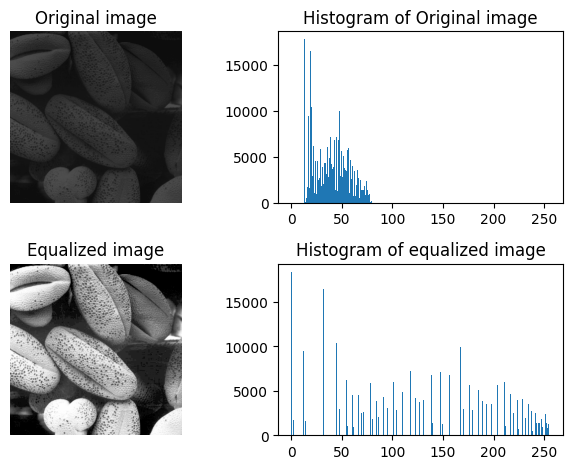

In [30]:
img5 = cv2.imread('a1images/shells.tif',0)

def transformation(img, tx):
    return tx[img]  # Vectorized transformation of the image

# Optimized Histogram Equalization
def imhistEq(img):
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])  # Compute histogram
    cdf = hist.cumsum()  # Compute the CDF
    cdf_normalized = cdf * 255 / cdf[-1]  # Normalize the CDF
    
    cdf_mapped = np.ma.masked_equal(cdf_normalized, 0)  # Mask zeros
    cdf_mapped = (cdf_mapped - cdf_mapped.min()) * 255 / (cdf_mapped.max() - cdf_mapped.min())
    cdf_mapped = np.ma.filled(cdf_mapped, 0).astype(np.uint8)  # Fill masked values with 0
    
    return hist, cdf_mapped

hist, cdfTx = imhistEq(img5)
hCimage = transformation(img5,cdfTx)

x=np.arange(256)
plt.subplot(2,2,3)
plt.title('Equalized image')
plt.imshow(hCimage,cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(2,2,4)
plt.hist(hCimage.ravel(),256,[0,256])
plt.title('Histogram of equalized image')
plt.subplot(2,2,1)
plt.imshow(img5,cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Original image')
plt.subplot(2,2,2)
plt.title('Histogram of Original image')
plt.hist(img5.ravel(),256,[0,256])

plt.tight_layout()
plt.show()

### 6. Apply histogram equalization only to the foreground of an image to produce an image with a histogram equalized foreground.

### a. Split it into hue, saturation, and values and display these planes in grayscale.

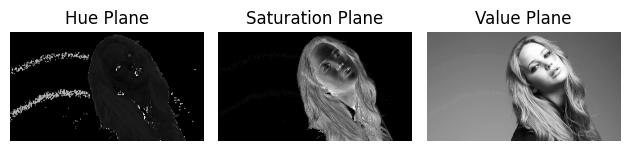

In [17]:
# Load the image and convert it to HSV color space
img6 = cv2.imread('a1images/jeniffer.jpg')  # Load in color mode
hsv = cv2.cvtColor(img6, cv2.COLOR_BGR2HSV)

# Split the image into hue, saturation, and value planes
H, S, V = cv2.split(hsv)

# Display the Hue, Saturation, and Value planes in grayscale
plt.subplot(1, 3, 1), plt.imshow(H, cmap='gray'), plt.title('Hue Plane')   #np.hstack([H, S, V])
plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(S, cmap='gray'), plt.title('Saturation Plane')
plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(V, cmap='gray'), plt.title('Value Plane')
plt.axis('off')
plt.tight_layout()
plt.show()


### (b) Select the appropriate plane to threshold in extract the foreground mask. 

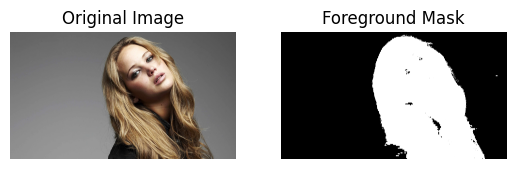

In [117]:
#use saturation plane to do foreground mask 
def mask_saturation(img, threshold):
    mask = img > threshold
    return mask

# Apply the mask_saturation function to the saturation plane
saturation_threshold = 11
mask = mask_saturation(S, saturation_threshold)

img6 = cv2.imread('a1images/jeniffer.jpg')

# Display the mask
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img6, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Foreground Mask')
plt.axis('off')
plt.show()

###  (c) Now obtain the foreground only using cv.bitwise_and and compute the histogram.

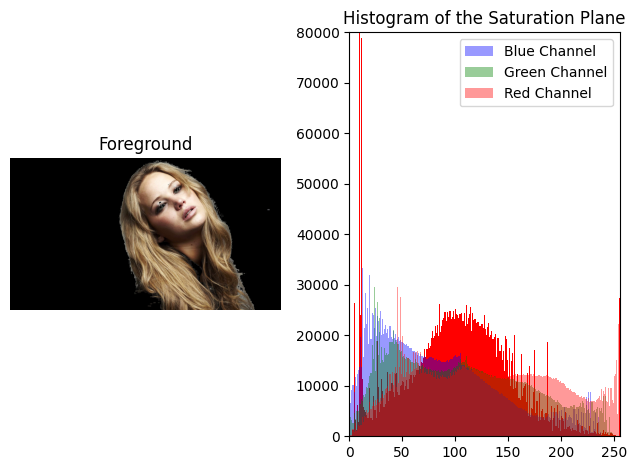

In [56]:
#obtain the foreground only using cv.bitwise_and
foreground = cv2.bitwise_and(img6, img6, mask=mask.astype(np.uint8))

# Display the foreground
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))
plt.title('Foreground')
plt.axis('off')

#compute the histogram
hist, bins = np.histogram(S.flatten(), 256, [0, 256])

# Plot the histogram 
plt.subplot(1, 2, 2)
plt.hist(S.flatten(), 256, [0, 256], color='r')
plt.hist(foreground[:, :, 0].flatten(), bins=256, range=[0, 256], color='b', alpha=0.4, label='Blue Channel')
plt.hist(foreground[:, :, 1].flatten(), bins=256, range=[0, 256], color='g', alpha=0.4, label='Green Channel')
plt.hist(foreground[:, :, 2].flatten(), bins=256, range=[0, 256], color='r', alpha=0.4, label='Red Channel')
plt.xlim([0, 256])
plt.ylim([0, 80000])  # Set a y-axis limit to reduce dominance of zeros
plt.legend()
plt.title('Histogram of the Saturation Plane')
plt.tight_layout()
plt.show()


###  (d) Obtain the cumulative sum of the histogram using np.cumsum.

In [57]:
# Calculate the cumulative sum (CDF) of the histogram
cdf_foreground = np.cumsum(hist)
print(cdf_foreground)

# Normalize the CDF
cdf_min = cdf_foreground.min()
cdf_max = cdf_foreground.max()
cdf_foreground_normalized = (cdf_foreground - cdf_min) * 255 / (cdf_max - cdf_min)
cdf_foreground_normalized = cdf_foreground_normalized.astype('uint8')


[5298849 5298849 5298950 5300192 5326554 5329806 5331060 5337324 5340150
 5462566 5486514 5565480 5576749 5582551 5587670 5592493 5596659 5600186
 5603746 5613233 5616769 5619900 5627849 5632974 5638274 5641901 5660685
 5670458 5675247 5681592 5692883 5701846 5707670 5713525 5719895 5728537
 5741342 5748408 5757410 5768008 5778658 5787522 5795272 5807671 5820200
 5828871 5837105 5845222 5855256 5865347 5876257 5887036 5896267 5906138
 5917213 5926547 5937794 5950016 5962141 5972655 5984805 5996538 6008652
 6021688 6034820 6047887 6061761 6075008 6089680 6104261 6119669 6136899
 6152599 6169850 6188367 6205870 6223844 6243367 6264270 6283742 6303680
 6325472 6345982 6367944 6387718 6413915 6434470 6456347 6479389 6502813
 6527470 6550392 6575050 6598675 6623403 6648134 6671277 6694804 6719573
 6742858 6768042 6792253 6816322 6839796 6864075 6888215 6912613 6935524
 6959888 6981637 7007628 7029880 7053226 7077515 7103160 7123922 7148328
 7171421 7194690 7217938 7240442 7263015 7285623 73

###  (e) Use the formulas in slides to histogram-equalize the foreground.

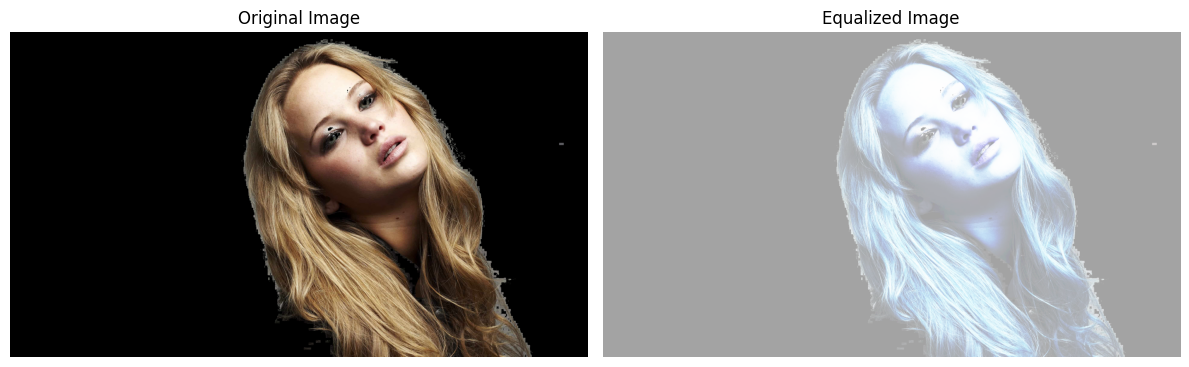

In [58]:
def equalize_histogram(histogram: np.ndarray, bins: np.ndarray, image: np.ndarray) -> np.ndarray:
    
    # Number of intensity levels (for 8-bit images)
    L = 256
    MN = image.shape[0] * image.shape[1]  # Total number of pixels in the image
    
    # Normalize the histogram (probability distribution function)
    new_hist = histogram / MN
    
    # Calculate the cumulative distribution function (CDF)
    hist_cdf = np.cumsum(new_hist)
    
    # Scale the CDF to the range of intensity levels [0, L-1]
    hist_cdf = (hist_cdf * (L - 1)).round().astype(np.uint8)
    
    # Remove the last bin if there are 257 bins (255 intensity levels)
    if bins.shape == (257,):
        bins = bins[:-1].astype(np.uint8)
    
    # Return the equalized image based on the new intensity mapping
    equalized_image = hist_cdf[image]
    
    return equalized_image

# Usage
jeniffer_blue_equalised = equalize_histogram(histogram=hist, bins=bins, image=foreground[:,:,0])
jeniffer_green_equalised = equalize_histogram(histogram=hist, bins=bins, image=foreground[:,:,1])
jeniffer_red_equalised = equalize_histogram(histogram=hist, bins=bins, image=foreground[:,:,2])

# Merge the equalized color channels
equalized_image = np.stack([jeniffer_red_equalised, jeniffer_green_equalised, jeniffer_blue_equalised], axis=-1)

# Display the original and equalized images
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.title('Equalized Image')
plt.axis('off')

plt.tight_layout()
plt.show()

###  (f) Extract the background and add with the histogram equalized foreground

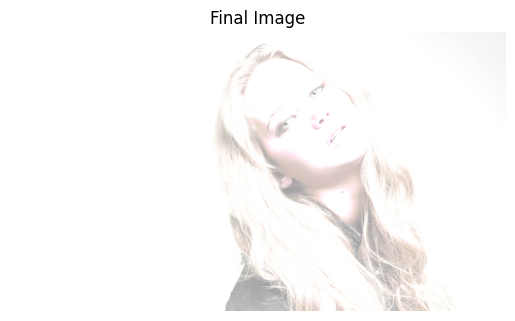

In [61]:
# Extract the background and add with the histogram equalized foreground
background = cv2.bitwise_and(img6, img6, mask=~mask.astype(np.uint8))
final_image = cv2.add(background, equalized_image)

# Display the final image
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
plt.title('Final Image')
plt.axis('off')
plt.show()

### 7. Filtering with the Sobel Operator

### (a) Using Existing 2D Sobel Filter in OpenCV

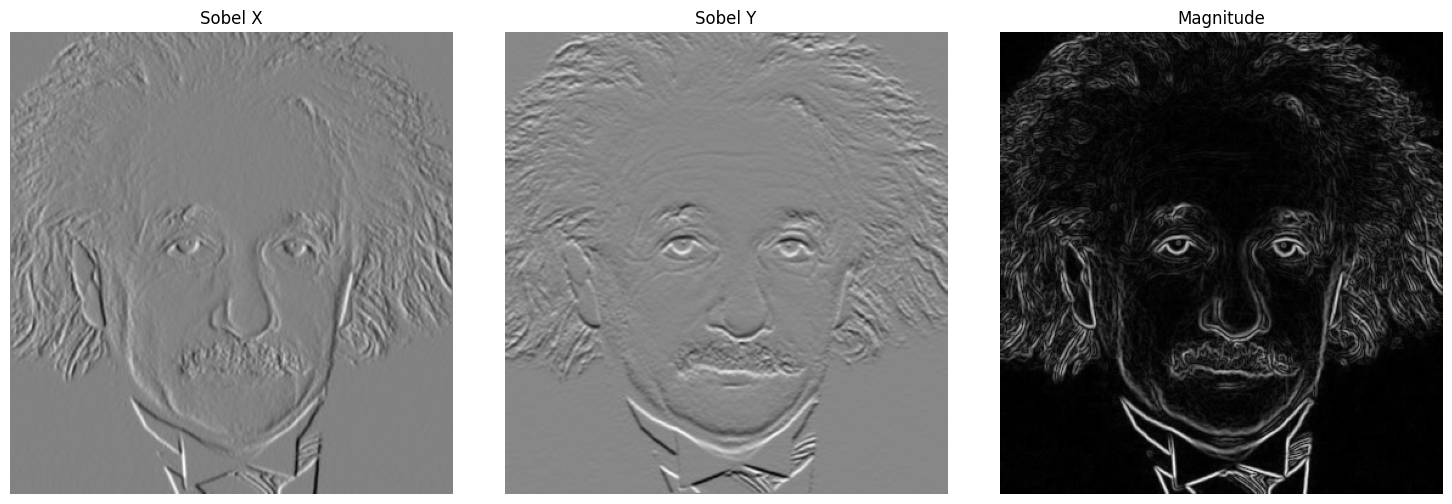

In [65]:
img7 = cv2.imread('a1images/einstein.png', cv2.IMREAD_GRAYSCALE)

# Use the existing filter 2D to Sobel filter the image
sobel_x = cv2.Sobel(img7, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img7, cv2.CV_64F, 0, 1, ksize=3)

# Compute the magnitude of the gradient
magnitude = np.sqrt(sobel_x ** 2 + sobel_y ** 2)

# Display sobel x, sobel y, magnitude, and direction
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), plt.imshow(sobel_x, cmap='gray'), plt.title('Sobel X')
plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(sobel_y, cmap='gray'), plt.title('Sobel Y')
plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(magnitude, cmap='gray'), plt.title('Magnitude')
plt.axis('off')
plt.tight_layout()
plt.show()

### (b) Write Code to Manually Apply Sobel Filter

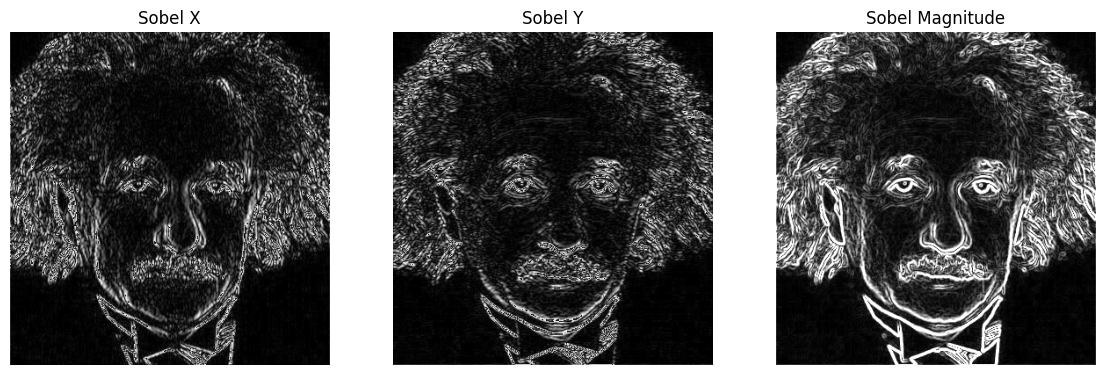

In [123]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
albert_img = cv2.imread("a1images/einstein.png", cv2.IMREAD_GRAYSCALE)

# Get image dimensions
height, width = albert_img.shape

# Define Sobel kernels
sobel_kernel_x = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])

sobel_kernel_y = np.array([[1, 2, 1],
                           [ 0,  0,  0],
                           [ -1, -2,  -1]])

# Initialize empty arrays to store results
sobel_x = np.zeros_like(albert_img, dtype=np.float64)
sobel_y = np.zeros_like(albert_img, dtype=np.float64)

# Padding the image to handle the edges
padded_img = np.pad(albert_img, ((1, 1), (1, 1)), mode='constant')

# Perform convolution with the Sobel kernel manually
for i in range(1, height+1):
    for j in range(1, width+1):
        # Extract the 3x3 region from the padded image
        region = padded_img[i-1:i+2, j-1:j+2]
        
        # Apply the Sobel kernels
        gx = np.sum(sobel_kernel_x * region)
        gy = np.sum(sobel_kernel_y * region)
        
        # Store the result in the output arrays
        sobel_x[i-1, j-1] = gx
        sobel_y[i-1, j-1] = gy

# Combine the horizontal and vertical Sobel results to get the gradient magnitude
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_magnitude = np.clip(sobel_magnitude, 0, 255)  # Clip values to valid range

# Convert the result back to uint8 format
sobel_x = np.uint8(np.abs(sobel_x))
sobel_y = np.uint8(np.abs(sobel_y))
sobel_magnitude = np.uint8(sobel_magnitude)

# Plotting the results
plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sobel_magnitude, cmap='gray')
plt.title('Sobel Magnitude')
plt.axis('off')

plt.show()

### (c) Using the Property Shown in the Image (Separable Sobel Filter)

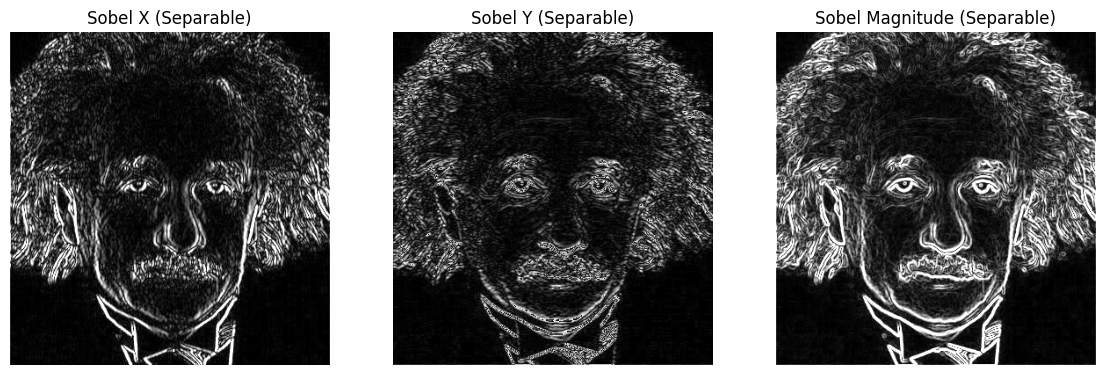

In [122]:
# Define the 1D Sobel kernels (separable)
sobel_kernel_v = np.array([1, 2, 1])  # Vertical 1D kernel (for smoothing)
sobel_kernel_h = np.array([1, 0, -1])  # Horizontal 1D kernel (for edge detection)

# Initialize empty arrays to store intermediate and final results
sobel_x_intermediate = np.zeros_like(albert_img, dtype=np.float64)
sobel_x = np.zeros_like(albert_img, dtype=np.float64)

# Padding the image to handle the edges (for 1D vertical filter)
padded_img = np.pad(albert_img, ((1, 1), (0, 0)), mode='constant')

# Step 1: Apply vertical 1D kernel (along the rows)
for i in range(1, height+1):
    for j in range(0, width):
        # Apply the vertical kernel to the 3-pixel neighborhood in the column
        sobel_x_intermediate[i-1, j] = np.sum(padded_img[i-1:i+2, j] * sobel_kernel_v)

# Padding the intermediate result for horizontal filtering
padded_intermediate = np.pad(sobel_x_intermediate, ((0, 0), (1, 1)), mode='constant')

# Step 2: Apply horizontal 1D kernel (along the columns)
for i in range(0, height):
    for j in range(1, width+1):
        # Apply the horizontal kernel to the 3-pixel neighborhood in the row
        sobel_x[i, j-1] = np.sum(padded_intermediate[i, j-1:j+2] * sobel_kernel_h)

# Convert the result back to uint8 format, normalizing the values to 0-255
sobel_x = np.uint8(np.clip(np.abs(sobel_x), 0, 255))

# Plotting the results
plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X (Separable)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y (Separable)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sobel_magnitude, cmap='gray')
plt.title('Sobel Magnitude (Separable)')
plt.axis('off')

plt.show()

### 8. Zooming Images with Nearest-Neighbor and Bilinear Interpolation

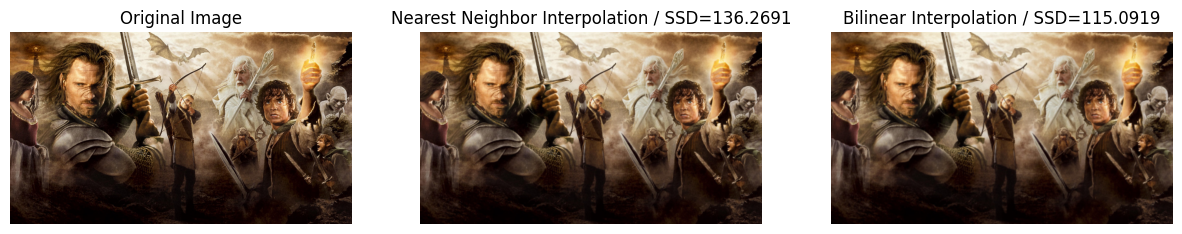

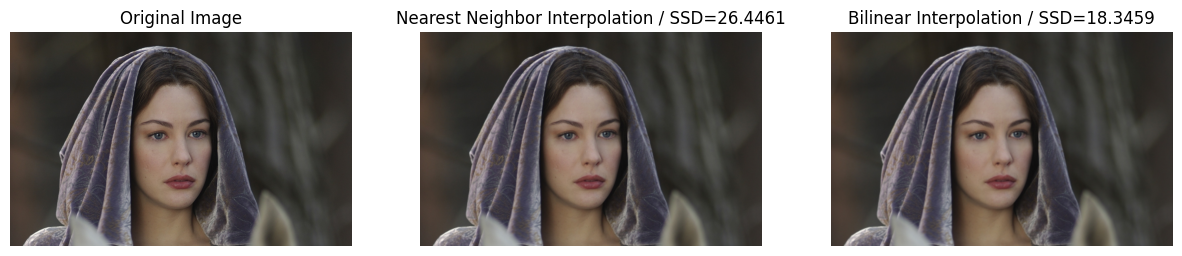

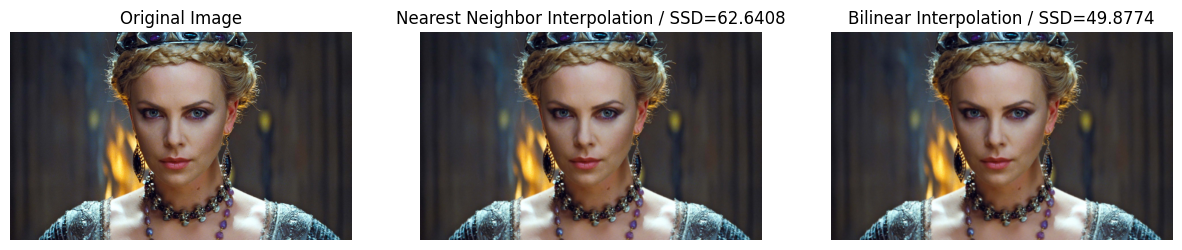

In [97]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to zoom an image by a given factor s
def zoom_image(input_img, s, interpolation_method):
    # Get the dimensions of the input image
    height, width = input_img.shape[:2]  # Only height and width are needed, even for color images
    
    # Calculate the new dimensions of the zoomed image
    new_height = int(height * s)
    new_width = int(width * s)

    # Apply the interpolation method
    if interpolation_method == 'nearest-neighbor':
        return cv2.resize(input_img, (new_width, new_height), interpolation=cv2.INTER_NEAREST)
    elif interpolation_method == 'bilinear':
        return cv2.resize(input_img, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
    else:
        raise ValueError('Invalid interpolation method. Please specify either "nearest-neighbor" or "bilinear".')

# Function to calculate the normalized sum of squared difference (SSD) between two images
def ssd_val(original, interpolated):
    # Ensure both images are of the same size
    if original.shape != interpolated.shape:
        raise ValueError("Original and interpolated images must have the same dimensions for SSD calculation.")
    
    # Compute the sum of squared differences
    ssd = np.sum((original.astype('float32') - interpolated.astype('float32')) ** 2)
    
    # Normalize the SSD
    normalized_ssd = ssd / np.prod(original.shape)
    
    return normalized_ssd

# Reading the images
im01_small_img = cv2.imread("a1images/a1q5images/im01small.png")
im01_img = cv2.imread("a1images/a1q5images/im01.png")

# Make sure the images are loaded properly
if im01_small_img is None or im01_img is None:
    raise ValueError("Images could not be loaded. Please check the file paths.")

# Plotting the first set of images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(im01_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
zoomed_nn = zoom_image(im01_small_img, 4, 'nearest-neighbor')
plt.imshow(cv2.cvtColor(zoomed_nn, cv2.COLOR_BGR2RGB))
plt.title(f"Nearest Neighbor Interpolation / SSD={ssd_val(im01_img, zoomed_nn):.4f}")
plt.axis('off')

plt.subplot(1, 3, 3)
zoomed_bilinear = zoom_image(im01_small_img, 4, 'bilinear')
plt.imshow(cv2.cvtColor(zoomed_bilinear, cv2.COLOR_BGR2RGB))
plt.title(f"Bilinear Interpolation / SSD={ssd_val(im01_img, zoomed_bilinear):.4f}")
plt.axis('off')

plt.show()


# Reading the images
im02_small_img = cv2.imread("a1images/a1q5images/im02small.png")
im02_img = cv2.imread("a1images/a1q5images/im02.png")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(im02_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
zoomed_nn = zoom_image(im02_small_img, 4, 'nearest-neighbor')
plt.imshow(cv2.cvtColor(zoomed_nn, cv2.COLOR_BGR2RGB))
plt.title(f"Nearest Neighbor Interpolation / SSD={ssd_val(im02_img, zoomed_nn):.4f}")
plt.axis('off')

plt.subplot(1, 3, 3)
zoomed_bilinear = zoom_image(im02_small_img, 4, 'bilinear')
plt.imshow(cv2.cvtColor(zoomed_bilinear, cv2.COLOR_BGR2RGB))
plt.title(f"Bilinear Interpolation / SSD={ssd_val(im02_img, zoomed_bilinear):.4f}")
plt.axis('off')

plt.show()

# Function to resize the zoomed image to match the original dimensions
def resize_to_match(original, interpolated):
    original_height, original_width = original.shape[:2]
    return cv2.resize(interpolated, (original_width, original_height))

# Reading the images
im03_small_img = cv2.imread("a1images/a1q5images/im03small.png")
im03_img = cv2.imread("a1images/a1q5images/im03.png")

plt.figure(figsize=(15, 5))

# Display original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(im03_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Nearest-neighbor interpolation
plt.subplot(1, 3, 2)
zoomed_nn = zoom_image(im03_small_img, 4, 'nearest-neighbor')
# Resize zoomed image to match original size
zoomed_nn_resized = resize_to_match(im03_img, zoomed_nn)
plt.imshow(cv2.cvtColor(zoomed_nn_resized, cv2.COLOR_BGR2RGB))
plt.title(f"Nearest Neighbor Interpolation / SSD={ssd_val(im03_img, zoomed_nn_resized):.4f}")
plt.axis('off')

# Bilinear interpolation
plt.subplot(1, 3, 3)
zoomed_bilinear = zoom_image(im03_small_img, 4, 'bilinear')
# Resize zoomed image to match original size
zoomed_bilinear_resized = resize_to_match(im03_img, zoomed_bilinear)
plt.imshow(cv2.cvtColor(zoomed_bilinear_resized, cv2.COLOR_BGR2RGB))
plt.title(f"Bilinear Interpolation / SSD={ssd_val(im03_img, zoomed_bilinear_resized):.4f}")
plt.axis('off')

plt.show()


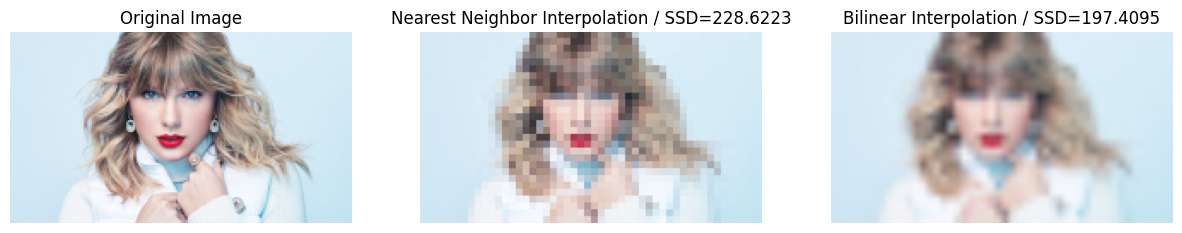

In [100]:
# Function to resize the zoomed image to match the original dimensions
def resize_to_match(original, interpolated):
    original_height, original_width = original.shape[:2]
    return cv2.resize(interpolated, (original_width, original_height))

# Reading the images
im04_small_img = cv2.imread("a1images/a1q5images/taylor_very_small.jpg")
im04_img = cv2.imread("a1images/a1q5images/taylor_small.jpg")

plt.figure(figsize=(15, 5))

# Display original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(im04_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Nearest-neighbor interpolation
plt.subplot(1, 3, 2)
zoomed_nn = zoom_image(im04_small_img, 4, 'nearest-neighbor')
# Resize zoomed image to match original size
zoomed_nn_resized = resize_to_match(im04_img, zoomed_nn)
plt.imshow(cv2.cvtColor(zoomed_nn_resized, cv2.COLOR_BGR2RGB))
plt.title(f"Nearest Neighbor Interpolation / SSD={ssd_val(im04_img, zoomed_nn_resized):.4f}")
plt.axis('off')

# Bilinear interpolation
plt.subplot(1, 3, 3)
zoomed_bilinear = zoom_image(im04_small_img, 4, 'bilinear')
# Resize zoomed image to match original size
zoomed_bilinear_resized = resize_to_match(im04_img, zoomed_bilinear)
plt.imshow(cv2.cvtColor(zoomed_bilinear_resized, cv2.COLOR_BGR2RGB))
plt.title(f"Bilinear Interpolation / SSD={ssd_val(im04_img, zoomed_bilinear_resized):.4f}")
plt.axis('off')

plt.show()


### 9. Image Segmentation with GrabCut and Background Blur

 (a) Use grabCut to segment the image. Show the final segmentation mask, foreground image, and
 background image.

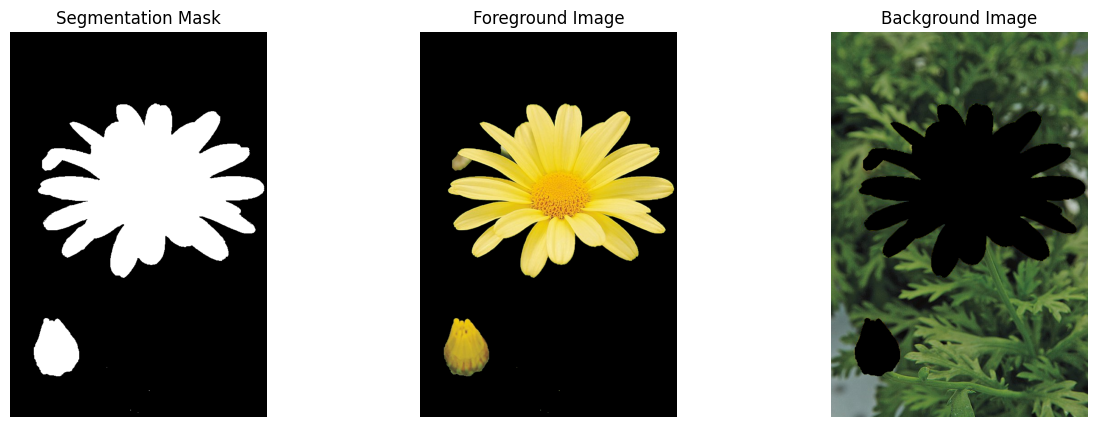

In [109]:
image = cv2.imread("a1images/daisy.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

# Create a mask and initialize background and foreground models
mask = np.zeros(image.shape[:2], np.uint8)
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

# Define a rectangle around the flower (adjust the coordinates based on the image)
rect = (50, 50, image.shape[1] - 50, image.shape[0] - 50)

# Apply GrabCut algorithm
cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

# Modify the mask to extract foreground and background
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
foreground = image_rgb * mask2[:, :, np.newaxis]

# Extract the background
background = image_rgb * (1 - mask2[:, :, np.newaxis])

# Display the final segmentation mask, foreground, and background
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(mask2, cmap='gray')
plt.title('Segmentation Mask')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(foreground)
plt.title('Foreground Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(background)
plt.title('Background Image')
plt.axis('off')

plt.show()


 (b) Produce an enhanced image with a substantially blurred background. Display the original image alongside the enhanced image.

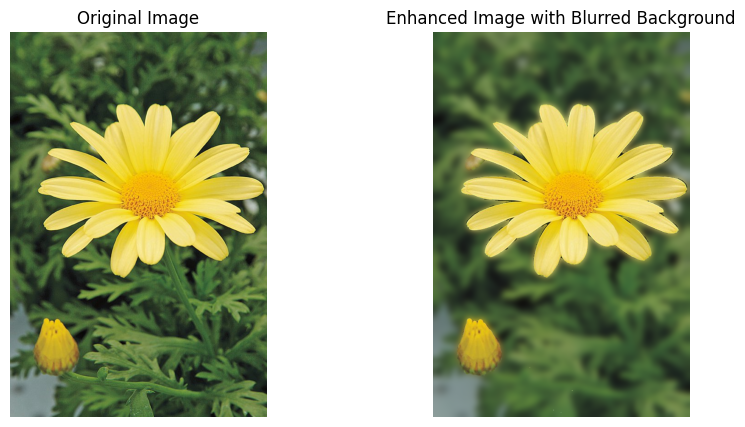

In [111]:
blurred_background = cv2.GaussianBlur(image_rgb, (45, 45), 0)

# Combine the foreground with the blurred background
enhanced_img = np.where(mask2[:, :, np.newaxis] == 1, image_rgb, blurred_background)

# Display the original and enhanced images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_img)
plt.title('Enhanced Image with Blurred Background')
plt.axis('off')

plt.show()

 (c) Why is the background just beyond the edge of the flower quite dark in the enhanced image?

The background just beyond the edge of the flower appears dark in the enhanced image due to the blending of the foreground and the blurred background. In areas near the boundary of the foreground object, some background pixels may be misclassified as part of the foreground, causing them to appear darker. The Gaussian blur applied to the background spreads out color intensities, which can cause this darkening effect around edges, especially where there is a high contrast between the foreground and background.
